# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import fftpack as fp, misc
from skimage.morphology import (diamond)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Restauração de imagens usando a Transformada Rápida de Fourier

 A Transformada Rápida de Fourier converte uma image do domínio do espaço para uma representação no domínio da frequência. 
 
 Faça uma análise das frequências obtidas para a [imagem](https://drive.google.com/file/d/1Udgllcno-XQOfE1RrIXGuiCopFYhn0pR/view?usp=sharing) abaixo e, utilizando uma máscara apropriada, remova as frequências indesejadas para remover o ruído.

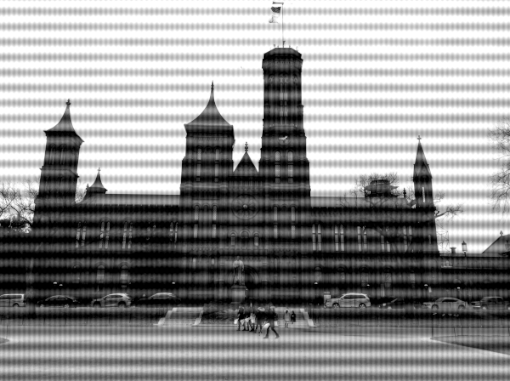

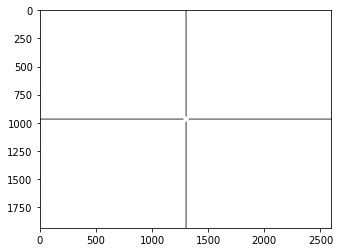

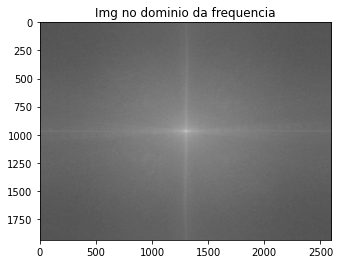

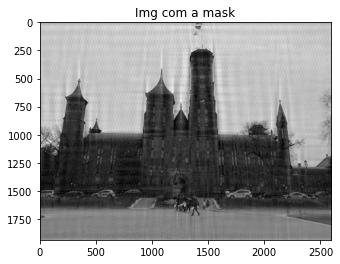

In [ ]:
# seu código aqui
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import fftpack as fp, misc

img = cv2.imread("/content/drive/MyDrive/Images/castle.jpg", 0)
plt.imshow(img, cmap = 'gray')
altura, largura = img.shape
mask = np.ones((altura, largura), dtype = "uint8")
raio = 25

cv2.line(mask, (largura//2, 0), (largura//2, (altura//2) - raio), 0, 5)
cv2.line(mask, (largura//2, altura), (largura//2, (altura//2) + raio), 0, 5)

cv2.line(mask, (0, altura//2), (largura//2 - raio, (altura//2)), 0, 5)
cv2.line(mask, (largura//2 + raio, altura//2), (largura, (altura//2)), 0, 5)


plt.imshow(mask, cmap = 'gray')
#calculando FFT 2D
F = fp.fft2(img)
mask = fp.fftshift(mask)

#tratando a FFT para os graficos
Fm = np.absolute(F)
Fm /= Fm.max()
Fm = fp.fftshift(Fm)
Fm = np.log(Fm)

F = F*mask

img_conv= fp.ifft2(F)
img_conv= np.absolute(img_conv)


plt.figure()
plt.title("Img no dominio da frequencia")
plt.imshow(Fm, cmap = 'gray')

plt.figure()
plt.title("Img com a mask")
plt.imshow(img_conv, cmap = 'gray')


#2. Erosão e Dilatação

Crie duas funções chamadas videoErosao e videoDilatacao.

A função videoErosao() receberá uma imagem em preto e branco como a apresentada abaixo e deverá aplicar a operação de erosão sucessivamente, até ela desaparecer. Faça um vídeo que aplique essa operação aos poucos, em formato de animação.

Realize procedimento semelhante para videoDilatacao(), porém fazendo o oposto da operação de dilatação.

OBS: <a href="https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html">Esse texto deverá ajudar</a>.

E para gerar o vídeo, <a href="https://colab.research.google.com/drive/1sQAxhv5nIWDvwt82osa2x41zVtUFyx1O?usp=sharing">clique aqui</a>.

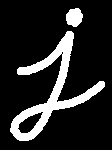

In [4]:
import numpy as np
import cv2
from skimage import morphology
from skimage.morphology import (diamond)

img = cv2.imread("/content/drive/MyDrive/Imagens/j.png")

#funcao do video de erosao
def videoErosao(img):
    altura, largura, _ = img.shape
    fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
    out = cv2.VideoWriter("videoErosao.avi", fourcc, 20.0, (largura, altura))
    cont = 0
    to_bgr = img.copy()
    to_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgCopy = to_bgr.copy()
    out.write(imgCopy)
    while(cont < 100):
        if(cont%10 == 0):
            imgCopy = cv2.cvtColor(imgCopy, cv2.COLOR_RGB2GRAY)
            imgCopy = cv2.erode(imgCopy, morphology.diamond(1))
            imgCopy = cv2.cvtColor(imgCopy, cv2.COLOR_GRAY2RGB)
        out.write(imgCopy)
        cont +=1
    out.release()

#funcao do video de dilatacao
def videoDilatacao(img):
    altura, largura, _ = img.shape
    fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
    out = cv2.VideoWriter("videoDilatacao.avi", fourcc, 20.0, (largura, altura))
    cont = 0
    to_bgr = img.copy()
    to_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgCopy = to_bgr.copy()
    out.write(imgCopy)
    while(cont < 70):
        imgCopy = cv2.cvtColor(imgCopy, cv2.COLOR_RGB2GRAY)
        imgCopy = cv2.dilate(imgCopy, morphology.diamond(1))
        imgCopy = cv2.cvtColor(imgCopy, cv2.COLOR_GRAY2RGB)
        out.write(imgCopy)
        cont +=1
    out.release()

videoErosao(img)
videoDilatacao(img)


Links para os vídeos:

#3. Detecção de linhas usando a Transformada de Hough

A Transformada de Hough é uma técnica que auxilia na detecção de formas geométricas em imagens digitais. 

Nesta aplicação, você deverá identificar as linhas que limitam uma via para que um carro autônomo possa seguir em tempo real. Devido a mudanças de iluminação, será necessário utilizar a transformada de Hough para conectar retas desconectadas. Utilize o seguinte [vídeo](https://drive.google.com/file/d/1G33NiG3rQuec-1hC-FshmjhLWiU1bGtO/view?usp=sharing) como entrada do algoritmo. O resultado de um frame deve ser como a imagem abaixo.

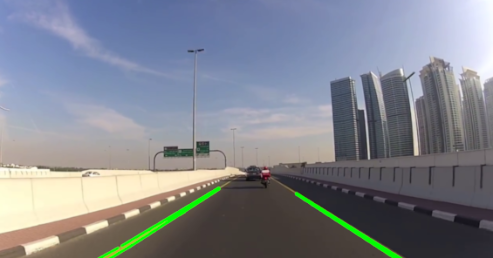

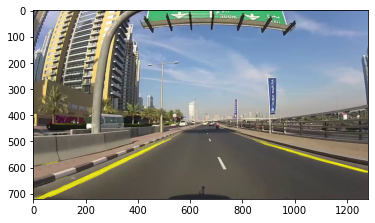

In [13]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Imagens/road_car_view.mp4')

#rodando os frames do video
for i in range(1, int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):

  _, frame = cap.read()

  hsvFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  #definindo o intervalo de cor que sera detectada (no caso a cor amarela
  lowerYellow = np.array([20, 90, 0])
  upperYellow = np.array([50, 220, 255])

  #criando a mascara para limitar a area da estrada
  mask = cv2.inRange(hsvFrame, lowerYellow, upperYellow)
  estrutura = np.zeros([720,1280]).astype('uint8')
  estrutura[490:720,:] = 1 
  mask = mask*estrutura
  lines = cv2.HoughLinesP(mask, 2, np.pi/180.0, 50, minLineLength = 10, maxLineGap = 50)
  #desenha linhas no video
  if(lines is not None):
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(frame, (x1, y1), (x2,y2), (0,255,255), 1)

  cv2.imshow('video', frame)
  #Exibindo o primeiro frame de saida com as linhas
  #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
  #plt.show()
  #break  
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
 

cap.release()
cv2.destroyAllWindows()


#4. Segmentação de Imagens com K-Means

Quando falamos de segmentação de imagens, dizemos que vamos localizar segmentos das imagens. Um algoritmo que realiza essa tarefa é o K-Means.

No vídeo abaixo é apresentado como usar esse algoritmo para fazer quantização de imagens, ou seja, representar as cores originais em menos quantidades.

Dito isso, assista o vídeo abaixo e implemente um algoritmo que transforma qualquer imagem em um gráfico para jogo 8 bits. Assim, pegue uma imagem e gere ela novamente com apenas 256 cores usando o K-means.

<a href="https://www.youtube.com/watch?v=iHlve4t5z-0"><img src="https://img.youtube.com/vi/iHlve4t5z-0/mqdefault.jpg"/></a>

OBS: O algoritmo K-means é discutido em mais detalhes nos vídeos abaixo.

<a href="https://www.youtube.com/watch?v=2hsMErlQtcI"><img src="https://img.youtube.com/vi/2hsMErlQtcI/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=p2twwtegYkU"><img src="https://img.youtube.com/vi/p2twwtegYkU/mqdefault.jpg"/></a>

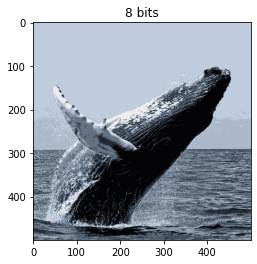

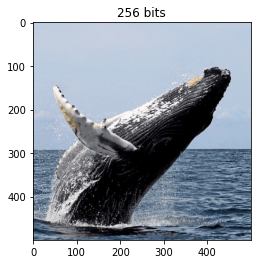

In [6]:
img = cv2.imread("/content/drive/MyDrive/Imagens/baleia.png")

z  = img.reshape((-1, 3))
z = np.float32(z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.1)

#img em 8 bits
k = 8
_, labels, centroides = cv2.kmeans(z, k, None, criteria, 40, cv2.KMEANS_RANDOM_CENTERS)

centroides = np.uint8(centroides)
imgColoridaComCentroides = centroides[labels.flatten()]
imgFinal = imgColoridaComCentroides.reshape(img.shape)

#img em 256 bits
k2 = 256
_, labels2, centroides2 = cv2.kmeans(z, k2, None, criteria, 40, cv2.KMEANS_RANDOM_CENTERS)

centroides2 = np.uint8(centroides2)
imgColoridaComCentroides2 = centroides2[labels2.flatten()]
imgFinal2 = imgColoridaComCentroides2.reshape(img.shape)

plt.figure()
plt.title("8 bits")
plt.imshow(cv2.cvtColor(imgFinal, cv2.COLOR_RGB2BGR))

plt.figure()
plt.title("256 bits")
plt.imshow(cv2.cvtColor(imgFinal2, cv2.COLOR_RGB2BGR))



#5. Segmentação usando o algoritmo GrabCut

Quando o assunto é obter o segmento exato que contém um objeto, o algoritmo GrabCut é excelente.

Nos vídeos abaixos há exemplos de sua implementação. 

<a href="https://www.youtube.com/watch?v=HBp6vQXFQgc"><img src="https://img.youtube.com/vi/HBp6vQXFQgc/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=DyRfAIQfVug"><img src="https://img.youtube.com/vi/DyRfAIQfVug/mqdefault.jpg"/></a>

Baseado nisso e nos conhecimentos anteriores, crie um algoritmo que segmente sua imagem e adicione por cima do fundo o efeito de borramento, usando um dos filtros explicados em lições passadas.

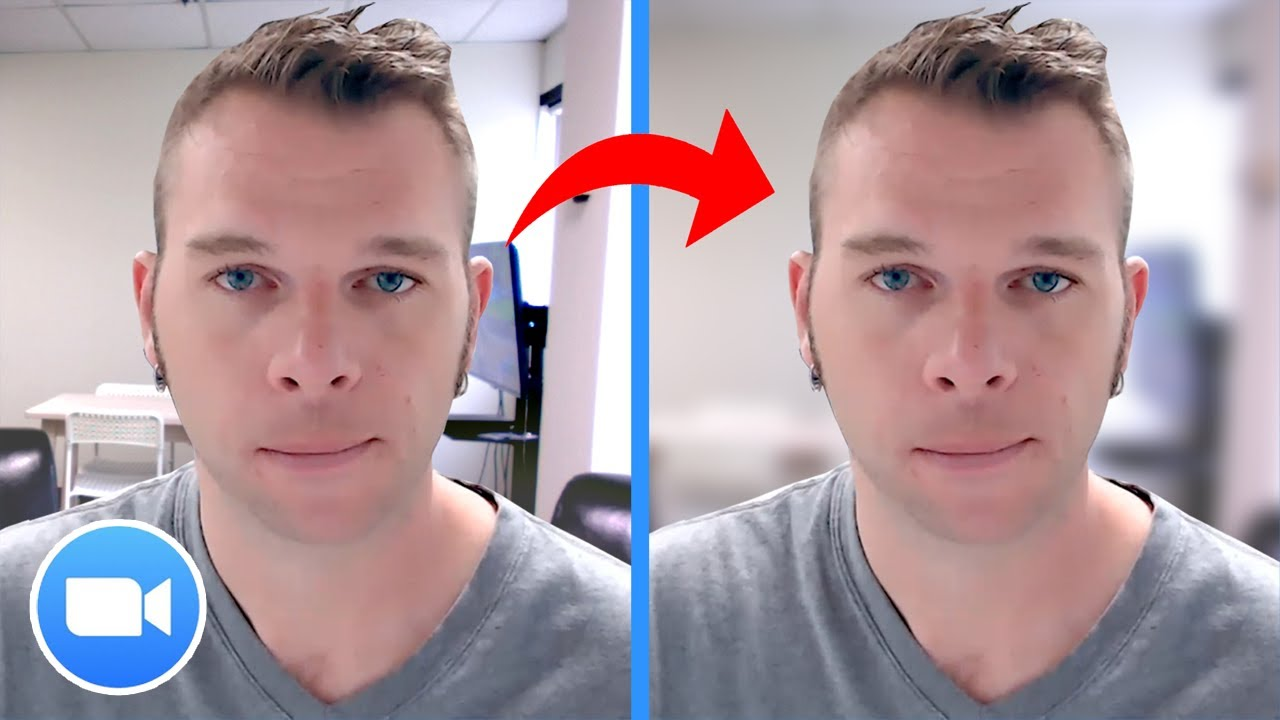

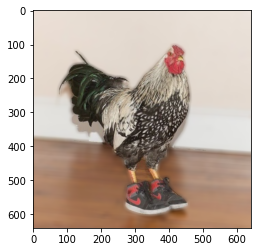

In [4]:
from pickletools import uint8
import numpy as np
import cv2
from matplotlib import pyplot as plt

#leitura de valores, mascara e copias
img = cv2.imread("/content/drive/MyDrive/Imagens/galo.jpg")
altura, largura, _ = img.shape
objeto = img.copy()
fundo = img.copy()
mask = np.zeros([altura, largura], np.uint8)

#região retangular na qual esta o objeto
rectGut = (69, 86, 440, 514)

#valores padrao do grabCut
fundoModel = np.zeros((1,65), np.float64)
objModel = np.zeros((1,65), np.float64)

#aplicação do grabCut
cv2.grabCut(objeto, mask, rectGut, fundoModel, objModel, 5, cv2.GC_INIT_WITH_RECT)

#definindo a mascara que possui o objeto
maskFinal = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

#gerando o fundo borrado
fundo = cv2.blur(fundo, (15,15))

#utilizando da mascara para aplicar apenas os pixels do objeto a imagem de fundo
fundo[np.logical_not(maskFinal == 0)] = img[np.logical_not(maskFinal == 0)]

plt.imshow(cv2.cvtColor(fundo, cv2.COLOR_RGB2BGR))
plt.show()